In [118]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows',100)

We'll drop all rows that have missing values for both *Height* and *Weight*.

In [119]:
df_athletes = pd.read_csv('./data/athlete_events.csv')
df_athletes.drop(columns=['Season','Games','Age','City'], inplace=True)
df_athletes.insert(5,"BMI",df_athletes.Weight/(df_athletes.Height/100)**2)
df_athletes.dropna(axis=0, how='all', subset=['Height','Weight'], inplace = True)
df_athletes.head(25)

,ID,Name,Sex,Height,Weight,BMI,Team,NOC,Year,Sport,Event,Medal
0,1,A Dijiang,M,180.0,80.0,24.691358,China,CHN,1992,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,170.0,60.0,20.761246,China,CHN,2012,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1988,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1988,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1992,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1992,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1994,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,185.0,82.0,23.959094,Netherlands,NED,1994,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
10,6,Per Knut Aaland,M,188.0,75.0,21.220009,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,188.0,75.0,21.220009,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN


In [88]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212333 entries, 0 to 271115
Data columns (total 12 columns):
ID        212333 non-null int64
Name      212333 non-null object
Sex       212333 non-null object
Height    210945 non-null float64
Weight    208241 non-null float64
BMI       206853 non-null float64
Team      212333 non-null object
NOC       212333 non-null object
Year      212333 non-null int64
Sport     212333 non-null object
Event     212333 non-null object
Medal     31332 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 21.1+ MB


In [22]:
df_athletes.describe()

,ID,Height,Weight,BMI,Year
count,271116.000000,210945.000000,208241.000000,206853.000000,271116.000000
mean,68248.954396,175.338970,70.702393,22.784520,1978.378480
std,39022.286345,10.518462,14.348020,2.912067,29.877632
min,1.000000,127.000000,25.000000,8.360954,1896.000000
25%,34643.000000,168.000000,60.000000,20.957171,1960.000000
50%,68205.000000,175.000000,70.000000,22.530864,1988.000000
75%,102097.250000,183.000000,79.000000,24.212293,2002.000000
max,135571.000000,226.000000,214.000000,63.901580,2016.000000


In [23]:
df_athletes_counts = df_athletes.groupby(['Sport','Event']).count().sort_values(by='ID', ascending=False)
df_athletes_counts.head(25)

,,ID,Name,Sex,Height,Weight,BMI,Team,NOC,Year,Medal
Sport,Event,,,,,,,,,,
Football,Football Men's Football,5733,5733,5733,3662,3549,3548,5733,5733,5733,1269
Ice Hockey,Ice Hockey Men's Ice Hockey,4762,4762,4762,3857,3839,3825,4762,4762,4762,1230
Hockey,Hockey Men's Hockey,3958,3958,3958,2910,2877,2874,3958,3958,3958,1050
Water Polo,Water Polo Men's Water Polo,3358,3358,3358,2300,2236,2236,3358,3358,3358,866
Basketball,Basketball Men's Basketball,3280,3280,3280,2630,2471,2468,3280,3280,3280,687
Cycling,"Cycling Men's Road Race, Individual",2947,2947,2947,2165,2126,2120,2947,2947,2947,77
Gymnastics,Gymnastics Men's Individual All-Around,2500,2500,2500,1460,1417,1416,2500,2500,2500,85
Rowing,Rowing Men's Coxed Eights,2423,2423,2423,1473,1501,1416,2423,2423,2423,730
Gymnastics,Gymnastics Men's Team All-Around,2411,2411,2411,1226,1189,1188,2411,2411,2411,713


In [92]:
df_athletes.groupby(['Sport']).count().sort_values(by='ID', ascending=False).head(25)

,ID,Name,Sex,Height,Weight,BMI,Team,NOC,Year,Event,Medal
Sport,,,,,,,,,,,
Athletics,32940,32940,32940,32907,32601,32568,32940,32940,32940,32940,3671
Swimming,19158,19158,19158,19150,18804,18796,19158,19158,19158,19158,2566
Gymnastics,18671,18671,18671,18662,18335,18326,18671,18671,18671,18671,1213
Rowing,8059,8059,8059,7920,7933,7794,8059,8059,8059,8059,2249
Cycling,7987,7987,7987,7976,7830,7819,7987,7987,7987,7987,877
Cross Country Skiing,7671,7671,7671,7669,7537,7535,7671,7671,7671,7671,710
Shooting,7670,7670,7670,7669,7300,7299,7670,7670,7670,7670,648
Fencing,6962,6962,6962,6962,6540,6540,6962,6962,6962,6962,1220
Alpine Skiing,6404,6404,6404,6394,6350,6340,6404,6404,6404,6404,358


Let's take a quick look at the number of *Height* and *Weight* measurements we have for our three sports. From 1960 on, we have at least 100 samples for each sport, which seems reasonable. Thus, we decide to look at all years starting at 1960.

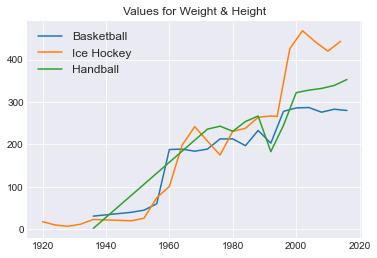

In [117]:
sports_list = ['Basketball','Ice Hockey','Handball']
for sport in sports_list:
    plt.plot(df_athletes[(df_athletes.Sport == sport)].groupby(['Year']).count()['BMI'])
plt.title('Values for Weight & Height')
plt.legend(sports_list)
plt.show()

In [115]:
df_athletes[(df_athletes.Sport == 'Handball')].groupby(['Year']).count()

,ID,Name,Sex,Height,Weight,BMI,Team,NOC,Sport,Event,Medal
Year,,,,,,,,,,,
1936,2,2,2,2,2,2,2,2,2,2,1
1972,236,236,236,236,236,236,236,236,236,236,45
1976,243,243,243,243,243,243,243,243,243,243,84
1980,231,231,231,231,231,231,231,231,231,231,83
1984,254,254,254,254,254,254,254,254,254,254,85
1988,267,267,267,267,267,267,267,267,267,267,83
1992,183,183,183,183,183,183,183,183,183,183,58
1996,247,247,247,247,245,245,247,247,247,247,72
2000,322,322,322,322,322,322,322,322,322,322,90


In [25]:
df_athletes_basketball = df_athletes.loc[(df_athletes['Sport']=='Basketball') * (df_athletes['Sex']=='M')]

In [26]:
df_USB_athletes = df_athletes.loc[(df_athletes['NOC']=='USA') * (df_athletes['Sport']=='Basketball') * (df_athletes['Sex']=='M')]
df_USB_athletes

,ID,Name,Sex,Height,Weight,BMI,Team,NOC,Year,Sport,Event,Medal
609,351,Julius Shareef Abdur-Rahim,M,202.0,104.0,25.487697,United States,USA,2000,Basketball,Basketball Men's Basketball,Gold
4623,2636,"Stephen Todd ""Steve"" Alford",M,185.0,74.0,21.621622,United States,USA,1984,Basketball,Basketball Men's Basketball,Gold
5031,2863,Walter Ray Allen,M,192.0,93.0,25.227865,United States,USA,2000,Basketball,Basketball Men's Basketball,Gold
6896,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,200.0,86.0,21.500000,United States,USA,1988,Basketball,Basketball Men's Basketball,Bronze
8164,4505,Carmelo Kyan Anthony,M,203.0,109.0,26.450533,United States,USA,2004,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
260944,130580,Deron Michael Williams,M,191.0,95.0,26.040953,United States,USA,2008,Basketball,Basketball Men's Basketball,Gold
260945,130580,Deron Michael Williams,M,191.0,95.0,26.040953,United States,USA,2012,Basketball,Basketball Men's Basketball,Gold
260983,130602,"Howard Earl ""Howie"" Williams",M,183.0,76.0,22.694019,United States,USA,1952,Basketball,Basketball Men's Basketball,Gold
261496,130843,"George ""Jiff"" Wilson",M,203.0,95.0,23.053217,United States,USA,1964,Basketball,Basketball Men's Basketball,Gold


In [27]:
df_USB_athletes.groupby('Year').mean()

,ID,Height,Weight,BMI
Year,,,,
1936,73106.428571,188.357143,80.714286,22.710571
1948,50097.928571,191.571429,88.785714,24.154016
1952,62544.571429,193.857143,86.928571,23.075028
1956,57030.416667,193.500000,90.916667,24.277537
1960,57849.250000,196.083333,89.000000,23.090494
1964,50475.833333,196.500000,92.666667,23.936864
1968,68272.500000,196.166667,91.166667,23.602779
1972,42961.750000,200.666667,90.750000,22.588942
1976,44875.750000,197.500000,92.833333,23.763289


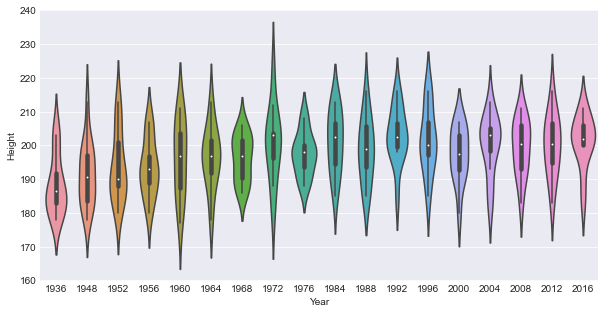

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='Year', y='Height', data = df_USB_athletes, ax=ax)

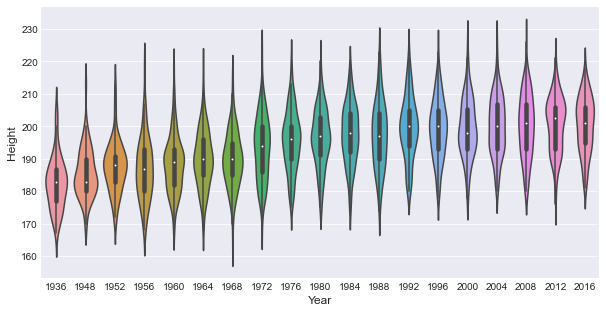

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='Year', y='Height', data = df_athletes_basketball, ax=ax)

In [42]:
df_athletes[(df_athletes.Sex == 'M')&(df_athletes.Sport == 'Basketball')].groupby('Year').mean()

,ID,Height,Weight,BMI
Year,,,,
1936,64139.703518,182.574074,79.903226,23.566471
1948,63228.717770,185.550725,81.902439,23.272793
1952,64555.758503,187.600000,84.586957,23.400231
1956,64693.355030,186.952941,86.000000,24.210425
1960,65184.765625,188.317708,84.037234,23.628138
1964,62718.042328,189.920635,84.544974,23.382907
1968,64682.575916,189.880435,83.820652,23.186829
1972,62677.373684,193.321053,86.740741,23.156713
1976,66213.042553,195.680851,88.872340,23.172680


In [43]:
df_athletes[(df_athletes.Sex == 'M')&(df_athletes.Sport == 'Basketball')].groupby('Year').median()

,ID,Height,Weight,BMI
Year,,,,
1936,65807.0,183.0,79.0,23.407509
1948,65517.0,183.0,80.0,23.149893
1952,69465.0,188.0,84.0,23.148148
1956,62495.0,187.0,85.0,24.221453
1960,71127.5,189.0,83.0,23.556169
1964,60324.0,190.0,84.0,23.245985
1968,65879.0,190.0,83.0,23.155761
1972,58935.5,194.0,86.0,23.143556
1976,62941.0,196.0,88.0,23.038752


In [85]:
def plot_stuff(sport_list=['Basketball'],sex='M',metric='Height', min_year = 0):
    plt.subplots(figsize=(10,6))
    if type(sport_list) != list:
        sport_list = [sport_list]
    legend_list = []
    for sport in sport_list:
        id_bool = (df_athletes['Sex'] == sex) & (df_athletes['Sport'] == sport)\
                & (df_athletes['Year'] > min_year) 
        df_tot = df_athletes.loc[id_bool]
        plt.plot(df_tot.groupby('Year').median()[metric])
        legend_list.append('{}'.format(sport))
    plt.gca().set_prop_cycle(None)        
    for sport in sport_list:            
        id_bool_gold = (df_athletes['Sex'] == sex) & (df_athletes['Sport'] == sport)\
                & (df_athletes['Year'] > min_year) & (df_athletes['Medal'] == 'Gold')
        df_gold = df_athletes.loc[id_bool_gold]
        plt.plot(df_gold.groupby('Year').mean()[metric],'--',alpha=0.6)        
        #color = next(ax._get_lines.prop_cycler)['color']
        #legend_list.append('{}: winners'.format(sport))
        
        
        
    #plt.legend(['{}: All Teams'.format(sport),'{}: Gold Medalist'.format(sport)])
    plt.title(metric+', Gold medalists dashed')
    plt.legend(legend_list)
    plt.rc('legend', fontsize=12)
    plt.rc('axes', labelsize=12)    
    plt.show()


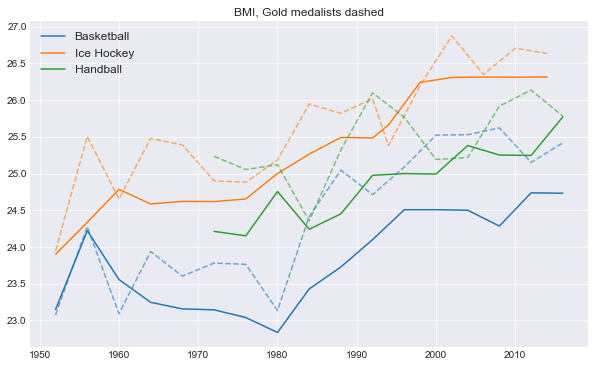

In [86]:
plot_stuff(sport_list=['Basketball','Ice Hockey','Handball'], metric='BMI', min_year = 1950)

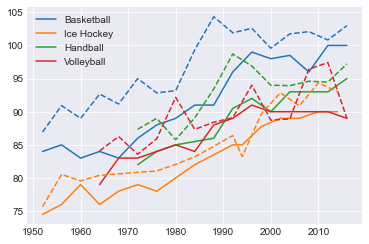

In [46]:

plot_stuff(sport_list=['Basketball','Ice Hockey','Handball','Volleyball'], metric='Weight', min_year = 1950)

In [16]:
sport_list='Basketball'
type([sport_list]) ==list
#sport_list = [sport_list]
#for bla in sport_list:
#    print(bla)
#type(sport_list)

True

In [17]:
sport_list=['Basketball']
type(sport_list) == list

True